In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-10 15:13:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-10 15:13:06 (101 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2021-07-10 15:13:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   189MB/s    in 7.4s    

2021-07-10 15:13:16 (208 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
unzip_data("101_food_classes_10_percent.zip")

In [ ]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

In [ ]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/bibimbap'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/spring_rolls'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/nachos'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/beet_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/macaroni_and_cheese'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/pork_chop'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/cheesecake'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/pad_thai'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/baklava'.
There are 0 directories and 250 images in '101_food

In [ ]:
import tensorflow as tf

In [ ]:
train_data_101_classes_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                        label_mode = "categorical",
                                                                                        image_size = (224, 224))
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = (224, 224),
                                                                shuffle = False) #We turn shuffle to False for test data for prediction analysis

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


#Feature extraction

In [ ]:
# Creating a checkpoint callback for feature extraction

checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         monitor = "val_accuracy",
                                                         verbose = 1,
                                                         save_best_only = True,
                                                         save_freq = "epoch",
                                                         save_weights_only = True)

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
data_augmentation = tf.keras.models.Sequential([
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomZoom(0.2)
], name = "data_augmentation_layer")

In [ ]:
base_model_b0 = tf.keras.applications.EfficientNetB0(include_top=False,)
base_model_b0.trainable = False

inputs = tf.keras.layers.Input(shape = (224, 224, 3))
x = data_augmentation(inputs)
x = base_model_b0(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(len(train_data_101_classes_10_percent.class_names), activation="softmax")(x)
model_b0 = tf.keras.Model(inputs, outputs)

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
model_b0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation_layer (Seq (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model_b0.compile(loss = tf.keras.losses.categorical_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

In [ ]:
model_b0_history_1 = model_b0.fit(train_data_101_classes_10_percent,
                                  epochs = 5,
                                  validation_data = test_data,
                                  validation_steps = int(0.15 * len(test_data)),
                                  callbacks = [checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 121s 364ms/step - loss: 3.4680 - accuracy: 0.2446 - val_loss: 2.6602 - val_accuracy: 0.4150

Epoch 00001: val_accuracy improved from -inf to 0.41499, saving model to 101_classes_10_percent_data_model_checkpoint
Epoch 2/5
237/237 [==============================] - 71s 299ms/step - loss: 2.3609 - accuracy: 0.4593 - val_loss: 2.2125 - val_accuracy: 0.4714

Epoch 00002: val_accuracy improved from 0.41499 to 0.47140, saving model to 101_classes_10_percent_data_model_checkpoint
Epoch 3/5
237/237 [==============================] - 65s 273ms/step - loss: 1.9726 - accuracy: 0.5316 - val_loss: 2.1186 - val_accuracy: 0.4693

Epoch 00003: val_accuracy did not improve from 0.47140
Epoch 4/5
237/237 [==============================] - 61s 257ms/step - loss: 1.7441 - accuracy: 0.5783 - val_loss: 1.9662 - val_accuracy: 0.5008

Epoch 00004: val_accuracy improved from 0.47140 to 0.50079, saving model to 101_classes_10_percent_data_model_checkpoint
Epoc

In [ ]:
# Evaluating on the whole dataset
feature_extraction_results = model_b0.evaluate(test_data) 
feature_extraction_results

790/790 [==============================] - 88s 111ms/step - loss: 1.7183 - accuracy: 0.5519


[1.7183469533920288, 0.5519207715988159]

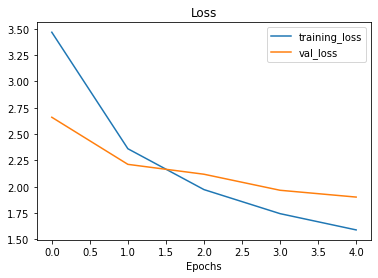

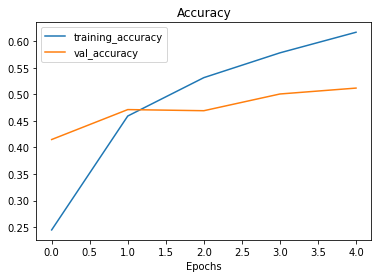

In [ ]:
plot_loss_curves(model_b0_history_1)

## Fine-tuning

In [ ]:
base_model_b0.trainable = True

for layer in base_model_b0.layers[:-5]:
  layer.trainable = False

In [ ]:
model_b0.compile(loss = tf.keras.losses.categorical_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics = ["accuracy"])

In [ ]:
model_b0_history_2_fine_tune = model_b0.fit(train_data_101_classes_10_percent,
                                            epochs = 10,
                                            validation_data = test_data,
                                            validation_steps = int(0.15 * len(test_data)),
                                            initial_epoch = model_b0_history_1.epoch[-1])

Epoch 5/10
237/237 [==============================] - 62s 235ms/step - loss: 1.3390 - accuracy: 0.6544 - val_loss: 1.9083 - val_accuracy: 0.5056
Epoch 6/10
237/237 [==============================] - 55s 232ms/step - loss: 1.2339 - accuracy: 0.6725 - val_loss: 1.9097 - val_accuracy: 0.5093
Epoch 7/10
237/237 [==============================] - 53s 221ms/step - loss: 1.1407 - accuracy: 0.7001 - val_loss: 1.8855 - val_accuracy: 0.5124
Epoch 8/10
237/237 [==============================] - 52s 219ms/step - loss: 1.0893 - accuracy: 0.7114 - val_loss: 1.8663 - val_accuracy: 0.5236
Epoch 9/10
237/237 [==============================] - 50s 208ms/step - loss: 1.0155 - accuracy: 0.7263 - val_loss: 1.8711 - val_accuracy: 0.5222
Epoch 10/10
237/237 [==============================] - 49s 207ms/step - loss: 0.9537 - accuracy: 0.7427 - val_loss: 1.8574 - val_accuracy: 0.5201


In [ ]:
model_b0_fine_tune_results = model_b0.evaluate(test_data)
model_b0_fine_tune_results

790/790 [==============================] - 87s 109ms/step - loss: 1.6181 - accuracy: 0.5743


[1.6181118488311768, 0.5743366479873657]

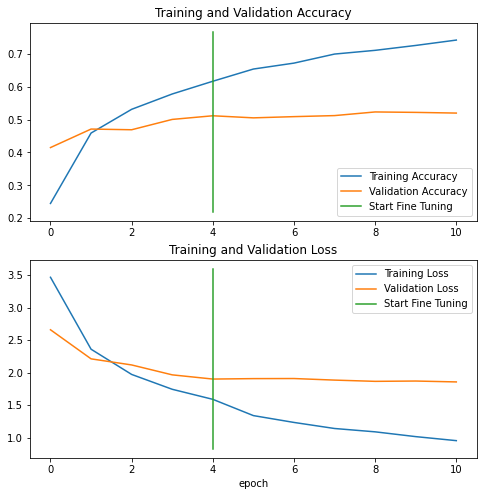

In [ ]:
# Comparing the history of feature extraction model with fine tuning model
compare_historys(model_b0_history_1, model_b0_history_2_fine_tune)

## Saving and loading our model

In [ ]:
# Saving our fine-tuned model

model_b0.save("drive/MyDrive/DeepLearning/model_b0_fine_tuned_model")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: drive/MyDrive/DeepLearning/model_b0_fine_tuned_model/assets


In [ ]:
# Loading and evaluating saved model
model_b0_loaded = tf.keras.models.load_model("drive/MyDrive/DeepLearning/model_b0_fine_tuned_model")

loaded_model_results = model_b0_loaded.evaluate(test_data)
loaded_model_results

790/790 [==============================] - 89s 111ms/step - loss: 1.6181 - accuracy: 0.5743


[1.6181118488311768, 0.5743366479873657]

## Evaluating the performance of the model_b0 across all different classes

Making some predictions, visualizing them and finding out which predictions were the "most" wrong.

In [ ]:
# Downloading a pre-trained model
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

--2021-07-10 15:34:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.195.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M   199MB/s    in 0.2s    

2021-07-10 15:34:23 (199 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [ ]:
unzip_data("06_101_food_class_10_percent_saved_big_dog_model.zip")

In [ ]:
# Loading in the pre-trained model we get 2 code cells above.
# Warnings while saving and loading can be ignored!!!

model = tf.keras.models.load_model("/content/06_101_food_class_10_percent_saved_big_dog_model")

In [ ]:
# Evaluating the model we have just downloaded on test data

results_downloaded_model = model.evaluate(test_data)
results_downloaded_model

790/790 [==============================] - 91s 113ms/step - loss: 1.8027 - accuracy: 0.6078


[1.8027206659317017, 0.6077623963356018]

## Making predictions with our trained model

In [ ]:
# Make predictions
pred_probs = model.predict(test_data, verbose=1)

790/790 [==============================] - 61s 76ms/step


In [ ]:
# How many predictions are there
len(pred_probs)

25250

In [ ]:
pred_probs.shape

(25250, 101)

In [ ]:
# Let's see what the first 10 predictions look like
pred_probs[:10]

array([[5.95420077e-02, 3.57419503e-06, 4.13768589e-02, ...,
        1.41386813e-09, 8.35307583e-05, 3.08974274e-03],
       [9.64016676e-01, 1.37532707e-09, 8.47805641e-04, ...,
        5.42872003e-05, 7.83623513e-12, 9.84663906e-10],
       [9.59258676e-01, 3.25335823e-05, 1.48669467e-03, ...,
        7.18913384e-07, 5.43973158e-07, 4.02759651e-05],
       ...,
       [4.73132670e-01, 1.29312355e-07, 1.48055656e-03, ...,
        5.97501639e-04, 6.69690999e-05, 2.34693434e-05],
       [4.45719399e-02, 4.72655188e-07, 1.22585356e-01, ...,
        6.34984963e-06, 7.53185031e-06, 3.67787597e-03],
       [7.24390090e-01, 1.92497107e-09, 5.23109738e-05, ...,
        1.22913450e-03, 1.57926350e-09, 9.63957209e-05]], dtype=float32)

In [ ]:
# What does the first probability array look like 
pred_probs[0]

array([5.9542008e-02, 3.5741950e-06, 4.1376859e-02, 1.0660556e-09,
       8.1613978e-09, 8.6639664e-09, 8.0926822e-07, 8.5652499e-07,
       1.9859017e-05, 8.0977776e-07, 3.1727747e-09, 9.8673661e-07,
       2.8532164e-04, 7.8049051e-10, 7.4230169e-04, 3.8916416e-05,
       6.4740193e-06, 2.4977280e-06, 3.7891099e-05, 2.0678388e-07,
       1.5538422e-05, 8.1506943e-07, 2.6230446e-06, 2.0010630e-07,
       8.3827456e-07, 5.4215989e-06, 3.7390860e-06, 1.3150533e-08,
       2.7761406e-03, 2.8051838e-05, 6.8562162e-10, 2.5574835e-05,
       1.6688865e-04, 7.6407297e-10, 4.0452729e-04, 1.3150634e-08,
       1.7957379e-06, 1.4448218e-06, 2.3062859e-02, 8.2466784e-07,
       8.5365781e-07, 1.7138614e-06, 7.0525107e-06, 1.8402169e-08,
       2.8553407e-07, 7.9483234e-06, 2.0681514e-06, 1.8525066e-07,
       3.3619774e-08, 3.1522498e-04, 1.0410913e-05, 8.5448539e-07,
       8.4741873e-01, 1.0555415e-05, 4.4094671e-07, 3.7404148e-05,
       3.5306231e-05, 3.2489133e-05, 6.7314817e-05, 1.2852616e

In [ ]:
pred_probs.shape

(25250, 101)

In [ ]:
tf.reduce_max(pred_probs[0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8474187>

In [ ]:
test_data.class_names[tf.argmax(pred_probs[0], axis = 0)]

'gyoza'

In [ ]:
#All predictions
pred_classes = [test_data.class_names[tf.argmax(pred_probs[i], axis = 0)] for i in range(25250)]
pred_classes[:10]

['gyoza',
 'apple_pie',
 'apple_pie',
 'pulled_pork_sandwich',
 'prime_rib',
 'lobster_roll_sandwich',
 'cup_cakes',
 'apple_pie',
 'samosa',
 'apple_pie']

In [ ]:
pred_classes1 = pred_probs.argmax(axis = 1)
pred_classes1[:10]

array([52,  0,  0, 80, 79, 61, 29,  0, 85,  0])

In [ ]:
len(pred_classes1)

25250

In [ ]:
#To get our test labels, we need to unravel our test_data BatchDataset

y_labels = []

for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
len(y_labels)

25250

## Evaluating our model's predictions

One way to check that our model's predictions array is in the same order as our test labels array is to find the accuracy score.

In [ ]:
results_downloaded_model = [1.8027207851409912, 0.6077623963356018]

In [ ]:
# Let's try scikit-learn's accuracy score function asnd see what it comes up with
from sklearn.metrics import accuracy_score

sklearn_accuracy = accuracy_score(y_labels, pred_classes1)
sklearn_accuracy

0.6077623762376237

In [ ]:
import numpy as np

np.isclose(sklearn_accuracy, results_downloaded_model[1])

True

## Making a confusion metrics

In [ ]:
from helper_functions import make_confusion_matrix

In [ ]:
class_names = test_data.class_names

We need to make some changes to our make_confusion_matrix function to ensure x-labels print vertically.

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Changed (plot x-labels vertically) ###
  plt.xticks(rotation = 70, fontsize = text_size)
  plt.yticks(fontsize = text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

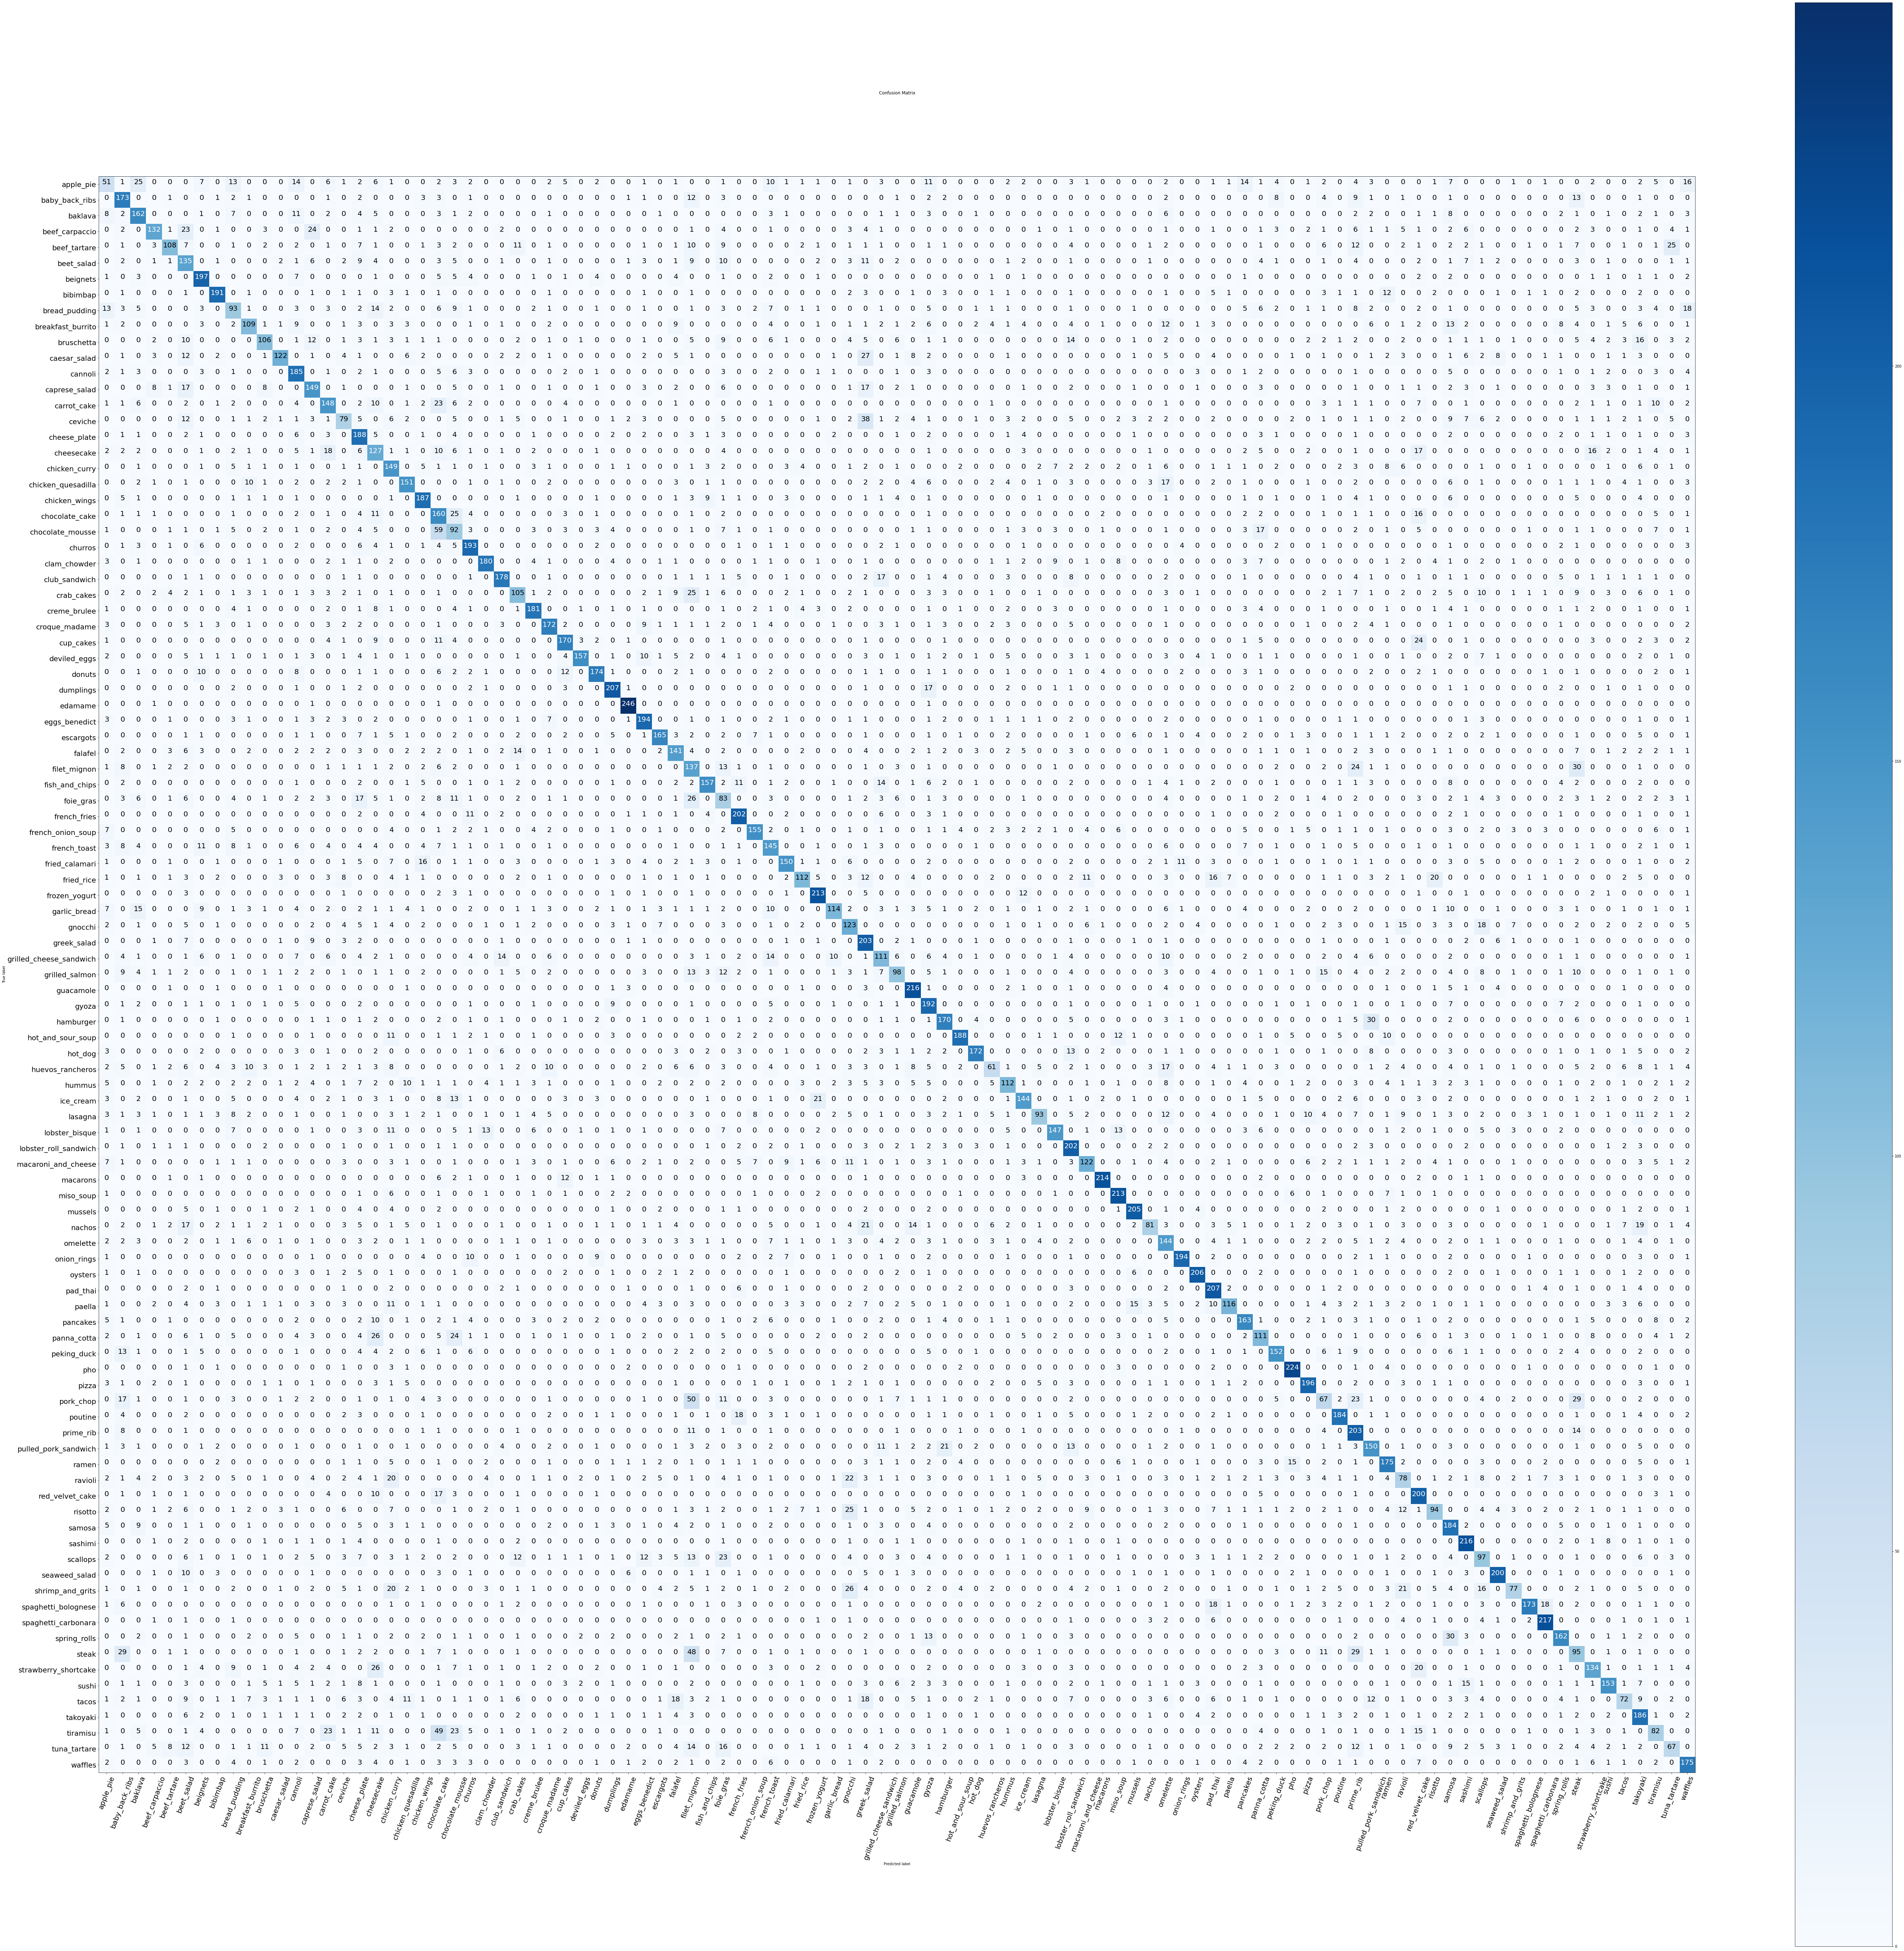

In [ ]:
make_confusion_matrix(y_labels,pred_classes1,class_names, figsize = (100,100), text_size=20, savefig=True)

## Classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_labels, pred_classes1))

              precision    recall  f1-score   support

           0       0.29      0.20      0.24       250
           1       0.51      0.69      0.59       250
           2       0.56      0.65      0.60       250
           3       0.74      0.53      0.62       250
           4       0.73      0.43      0.54       250
           5       0.34      0.54      0.42       250
           6       0.67      0.79      0.72       250
           7       0.82      0.76      0.79       250
           8       0.40      0.37      0.39       250
           9       0.62      0.44      0.51       250
          10       0.62      0.42      0.50       250
          11       0.84      0.49      0.62       250
          12       0.52      0.74      0.61       250
          13       0.56      0.60      0.58       250
          14       0.56      0.59      0.57       250
          15       0.44      0.32      0.37       250
          16       0.45      0.75      0.57       250
          17       0.37    

In [ ]:
# Get a dictionary of the classification report by setting up "output_dict" parameter as "True"

classification_report_dict = classification_report(y_labels, pred_classes1, output_dict=True)

## Plotting all of the classes' F1-scores

In [ ]:
# Create an emty dict
class_f1_scores = {}

# Loop through classification report dictionary items
for k, v in classification_report_dict.items():
  if k == "accuracy": # Stop once we get to the "accuracy" key
    break
  else:
    # Add class names and F1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]

class_f1_scores

{'apple_pie': 0.24056603773584903,
 'baby_back_ribs': 0.5864406779661017,
 'baklava': 0.6022304832713754,
 'beef_carpaccio': 0.616822429906542,
 'beef_tartare': 0.544080604534005,
 'beet_salad': 0.41860465116279066,
 'beignets': 0.7229357798165138,
 'bibimbap': 0.7908902691511386,
 'bread_pudding': 0.3866943866943867,
 'breakfast_burrito': 0.5117370892018779,
 'bruschetta': 0.5047619047619047,
 'caesar_salad': 0.6161616161616161,
 'cannoli': 0.6105610561056106,
 'caprese_salad': 0.5775193798449612,
 'carrot_cake': 0.574757281553398,
 'ceviche': 0.36744186046511623,
 'cheese_plate': 0.5654135338345864,
 'cheesecake': 0.42546063651591287,
 'chicken_curry': 0.5008403361344538,
 'chicken_quesadilla': 0.6411889596602972,
 'chicken_wings': 0.7123809523809523,
 'chocolate_cake': 0.45261669024045265,
 'chocolate_mousse': 0.3291592128801431,
 'churros': 0.7134935304990757,
 'clam_chowder': 0.7708779443254817,
 'club_sandwich': 0.734020618556701,
 'crab_cakes': 0.4625550660792952,
 'creme_brulee

In [ ]:
# Turn f1-scores into DataFrame for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending = False)

In [ ]:
f1_scores[:10]

class_names  f1-score
33              edamame  0.937143
63             macarons  0.895397
75                  pho  0.866538
91  spaghetti_carbonara  0.847656
69              oysters  0.834008
68          onion_rings  0.832618
65              mussels  0.820000
88        seaweed_salad  0.813008
64            miso_soup  0.812977
45        frozen_yogurt  0.811429

In [ ]:
import matplotlib.pyplot as plt

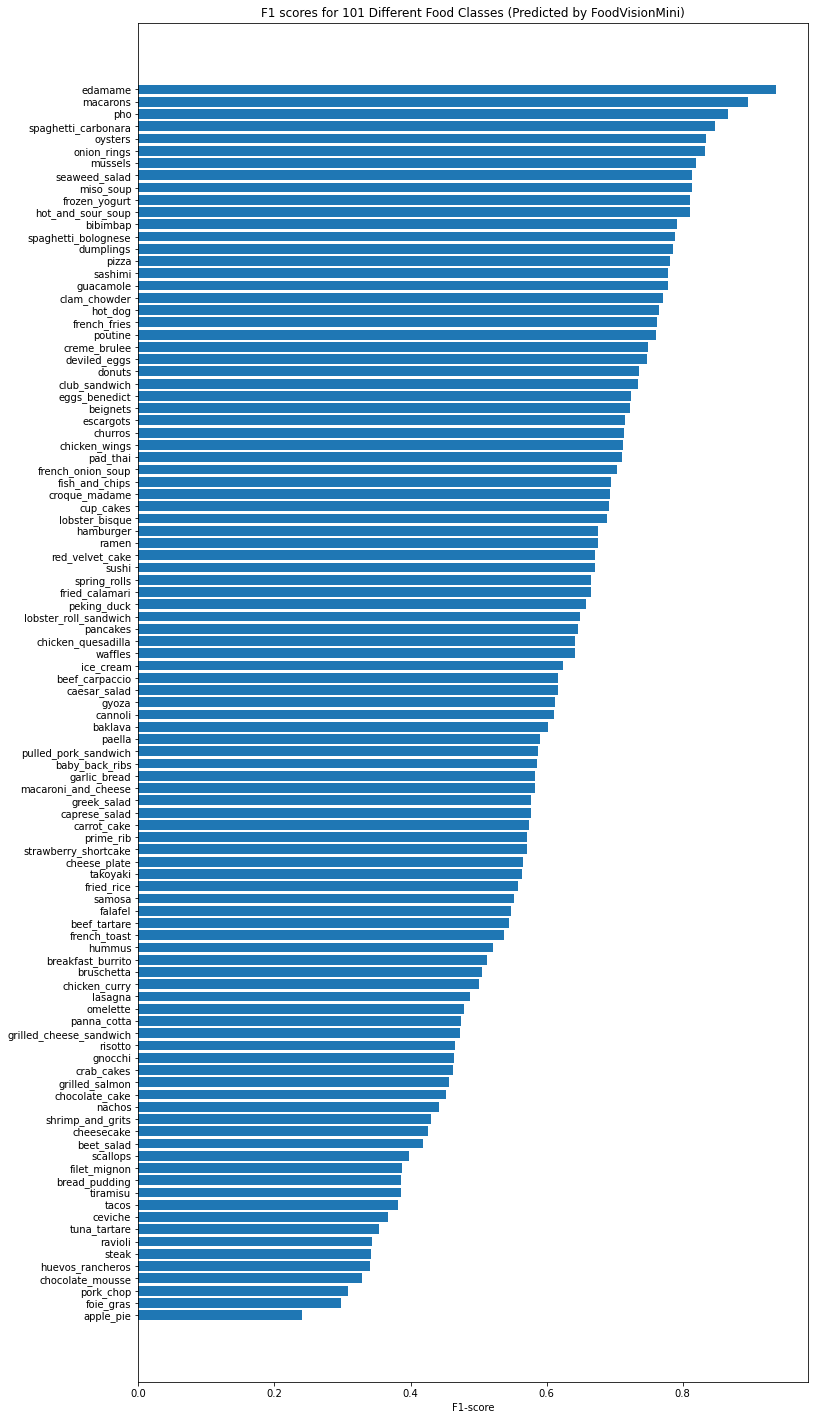

In [ ]:
# Visualizing the dataframe
fig, ax = plt.subplots(figsize = (12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values) # get f1-score values 
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1 scores for 101 Different Food Classes (Predicted by FoodVisionMini)")
ax.invert_yaxis(); # reverse the order of our plot

In [ ]:
# her class ın f1-score unu barın ucuna yazdırmak için fonksiyon
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

## Visualizing predictions on custom images

First the model will predict on the test_data and we ll visualize them.

Later on, the photos to be predicted is not in neither training nor test data. They are custom photos. 

In [ ]:
# Create a function to load and prepare images

def load_and_prep_image(filename, img_shape=224, scale = True):

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, [224, 224])

  # Scale? Yes/no
  if scale:
    # Rescale the image
    return img/255.

  else:
    return img

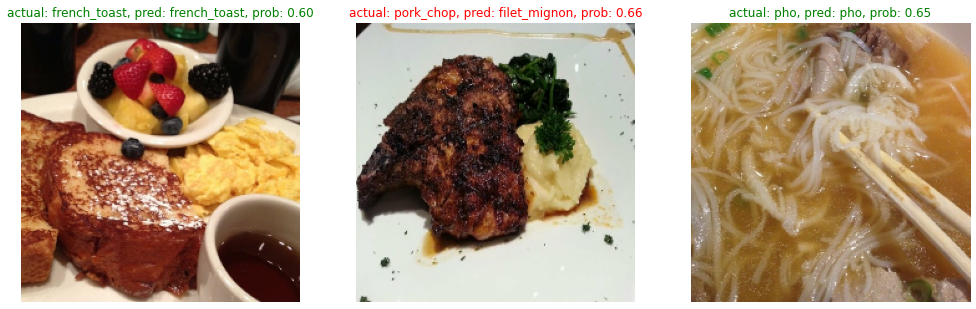

In [ ]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize = (17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  pred_prob = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[pred_prob.argmax()]

  # Plot the images
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False)

## Finding the most wrong predictions

To find out where our model is most wrong:

1- Get all of the image file paths in the test dataset using list_files() method

2- Create a pandas DataFrame of the image filepaths, ground truth labels, predicted classes (from our model), max prediction probabilities, prediction class names, ground truth class names.

3- Use our DataFrame to find all the wrong predictions (where the ground truth label doesn't match the prediction).

4- Sort the DataFrame based on wrong predictions (have the highest prediction probability predictions at the top).

5- Visualize the images with the highest prediction probabilities but have the wrong prediction.

In [ ]:
import pandas as pd

In [ ]:
filepaths = []

# Step 1
for filepath in test_data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg", shuffle = False):
  filepaths.append(filepath.numpy())

In [ ]:
# Step 2
pred_df = pd.DataFrame({"img_path": filepaths,
                       "y_true": y_labels,
                       "y_pred": pred_classes1,
                       "pred_conf": pred_probs.max(axis = 1),
                       "y_true_classname": [class_names[i] for i in y_labels],
                       "y_pred_classnames": [class_names[i] for i in pred_classes1]})
pred_df

img_path  ...     y_pred_classnames
0      b'/content/101_food_classes_10_percent/test/ap...  ...                 gyoza
1      b'/content/101_food_classes_10_percent/test/ap...  ...             apple_pie
2      b'/content/101_food_classes_10_percent/test/ap...  ...             apple_pie
3      b'/content/101_food_classes_10_percent/test/ap...  ...  pulled_pork_sandwich
4      b'/content/101_food_classes_10_percent/test/ap...  ...             prime_rib
...                                                  ...  ...                   ...
25245  b'/content/101_food_classes_10_percent/test/wa...  ...               waffles
25246  b'/content/101_food_classes_10_percent/test/wa...  ...          cheese_plate
25247  b'/content/101_food_classes_10_percent/test/wa...  ...               waffles
25248  b'/content/101_food_classes_10_percent/test/wa...  ...  strawberry_shortcake
25249  b'/content/101_food_classes_10_percent/test/wa...  ...               waffles

[25250 rows x 6 columns]

In [ ]:
# Step 3
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  ...  pred_correct
0  b'/content/101_food_classes_10_percent/test/ap...  ...         False
1  b'/content/101_food_classes_10_percent/test/ap...  ...          True
2  b'/content/101_food_classes_10_percent/test/ap...  ...          True
3  b'/content/101_food_classes_10_percent/test/ap...  ...         False
4  b'/content/101_food_classes_10_percent/test/ap...  ...         False

[5 rows x 7 columns]

In [ ]:
# Step 4: Sort our data frame to have most wrong predictions at the top
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending = False)[:100]
top_100_wrong.head()

img_path  ...  pred_correct
21810  b'/content/101_food_classes_10_percent/test/sc...  ...         False
231    b'/content/101_food_classes_10_percent/test/ap...  ...         False
15359  b'/content/101_food_classes_10_percent/test/lo...  ...         False
23539  b'/content/101_food_classes_10_percent/test/st...  ...         False
21400  b'/content/101_food_classes_10_percent/test/sa...  ...         False

[5 rows x 7 columns]

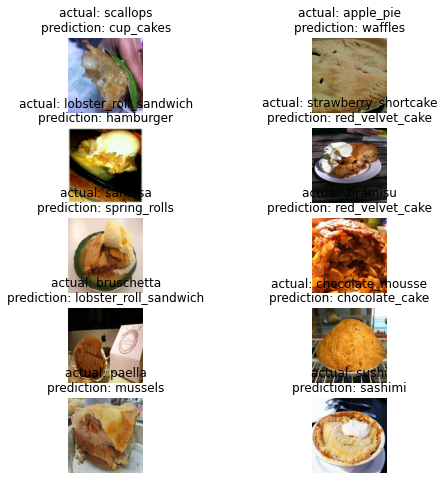

In [ ]:
# Step 5:

plt.figure(figsize = (8,8))
for i in range(10):
  plt.subplot(5, 2, i+1, )
  img = load_and_prep_image(pred_df["img_path"][i])
  plt.imshow(img)
  plt.title(f"actual: {top_100_wrong.iloc[i]['y_true_classname']}\nprediction: {top_100_wrong.iloc[i]['y_pred_classnames']}")
  plt.axis(False)


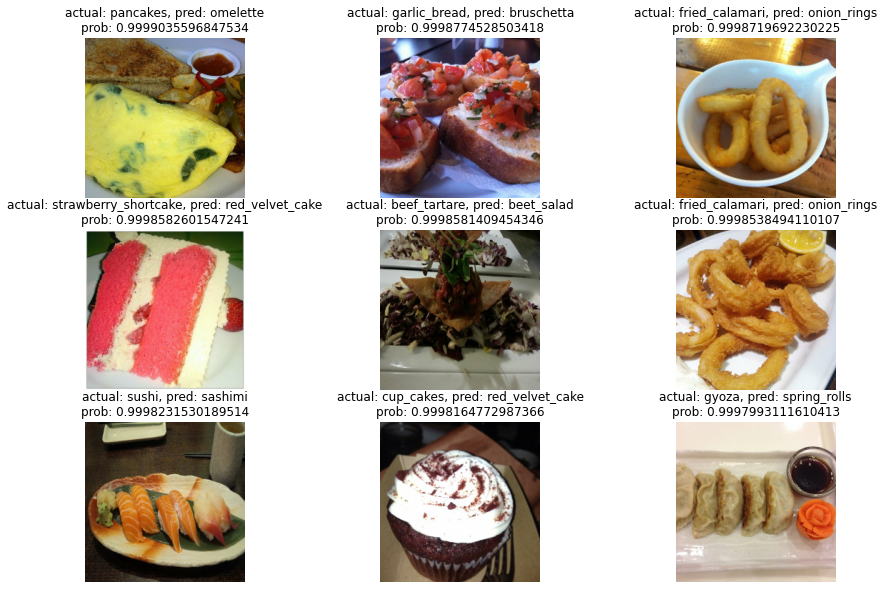

In [ ]:
# Step 5: (another way)
images_to_view = 9
start_index = 10 

plt.figure(figsize = (15,10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale = True)
  _, _, _, _, pred_prob, y_true_classname, y_pred_classnames, _ = row
  plt.imshow(img)
  plt.title(f"actual: {y_true_classname}, pred: {y_pred_classnames}\nprob: {pred_prob}")
  plt.axis(False)

## Testing out the model on a custom data

In [ ]:
# Get custom images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

--2021-07-10 18:35:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip’

custom_food_images. 100%[===================>]  12.58M  28.0MB/s    in 0.4s    

2021-07-10 18:35:30 (28.0 MB/s) - ‘custom_food_images.zip’ saved [13192985/13192985]



In [ ]:
unzip_data("/content/custom_food_images.zip")

In [ ]:
# Get custom food images filepaths
custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("/content/custom_food_images")]

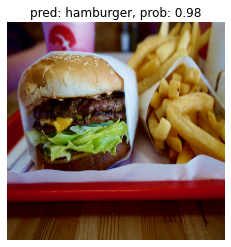

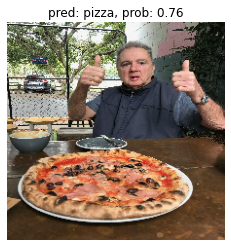

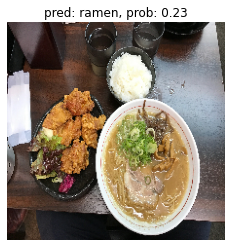

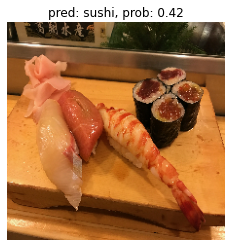

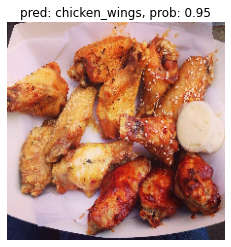

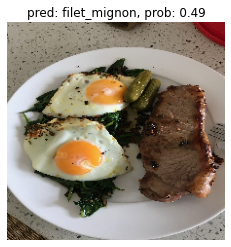

In [ ]:
# Make predictions on and plot custom food images
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False)
  pred_prob = model_b0.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[pred_prob.argmax()]

  #Plot the appropriate information
  plt.figure()
  plt.imshow(img/255.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)